In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# family = "AppleGothic"
family = "Malgun Gothic"

plt.rc('font', family=family)

In [3]:
sns.set(rc = {'figure.figsize' : (9, 9)})

### 여러컬럼의 상관계수
### 정오답
### 시계열

### 상관관계 시각화
#### 미국 주식 데이터

In [4]:
df = px.data.stocks()
df

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [5]:
df['date'] = pd.to_numeric(pd.to_datetime(df['date']))

In [6]:
corr_df = df.corr()
corr_df

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,1.000000,0.607766,0.633215,0.583894,0.261440,0.045324,0.948224
GOOG,0.607766,1.000000,0.833629,0.556702,0.633169,0.140254,0.747029
AAPL,0.633215,0.833629,1.000000,0.560877,0.493498,0.049519,0.786771
AMZN,0.583894,0.556702,0.560877,1.000000,0.341430,0.619946,0.660896
FB,0.261440,0.633169,0.493498,0.341430,1.000000,0.265663,0.472227
NFLX,0.045324,0.140254,0.049519,0.619946,0.265663,1.000000,0.079532
MSFT,0.948224,0.747029,0.786771,0.660896,0.472227,0.079532,1.000000


<Axes: >

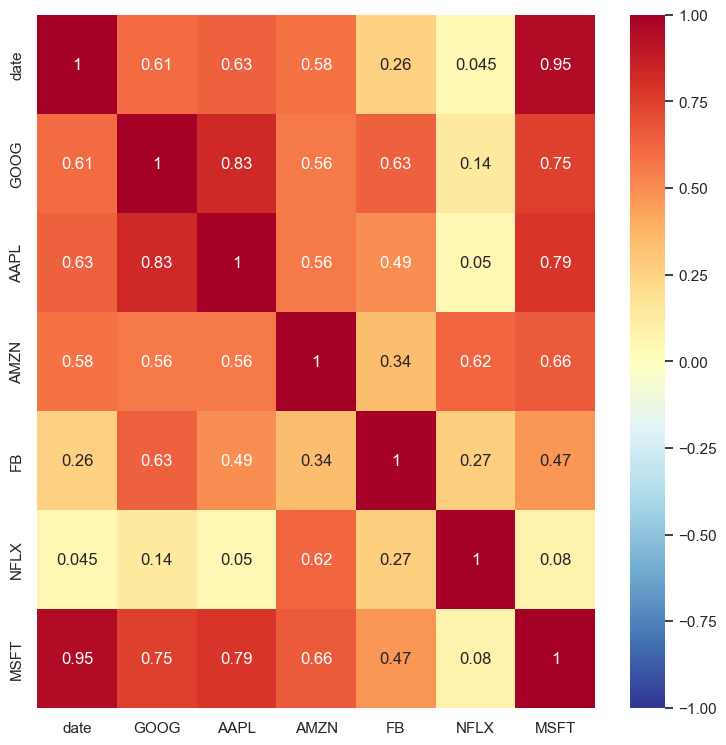

In [7]:
sns.heatmap(corr_df, annot=True ,cmap="RdYlBu_r", vmin=-1, vmax=1)

#### 타이타닉

In [8]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
df['sex'] = [True if sex=='male' else False for sex in df['sex'].values]
df['alive'] = [True if alive=='yes' else False for alive in df['alive'].values]
df['who'] = [True if who=='man' else False for who in df['who'].values]
df['class'] = [3 if cls == 'Third' else 2 if cls=='Second' else 1 for cls in df['class']] 
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,True,22.0,1,0,7.2500,S,3,True,True,NaN,Southampton,False,False
1,1,1,False,38.0,1,0,71.2833,C,1,False,False,C,Cherbourg,True,False
2,1,3,False,26.0,0,0,7.9250,S,3,False,False,NaN,Southampton,True,True
3,1,1,False,35.0,1,0,53.1000,S,1,False,False,C,Southampton,True,False
4,0,3,True,35.0,0,0,8.0500,S,3,True,True,NaN,Southampton,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,True,27.0,0,0,13.0000,S,2,True,True,NaN,Southampton,False,True
887,1,1,False,19.0,0,0,30.0000,S,1,False,False,B,Southampton,True,True
888,0,3,False,NaN,1,2,23.4500,S,3,False,False,NaN,Southampton,False,False
889,1,1,True,26.0,0,0,30.0000,C,1,True,True,C,Cherbourg,True,True


In [10]:
corr_df = df.corr()
corr_df

C:\Users\rluvu\AppData\Local\Temp\ipykernel_2620\690140719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.338481,-0.557080,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,1.000000,0.094035,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.131900,0.908578,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.369226,0.280328,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.083081,-0.253586,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.018443,-0.349943,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.549500,-0.182024,-0.182024,0.257307,-0.271832
class,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,1.000000,0.094035,0.094035,-0.338481,0.135207
who,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,0.094035,1.000000,1.000000,-0.557080,0.404744
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,0.094035,1.000000,1.000000,-0.557080,0.404744


<Axes: >

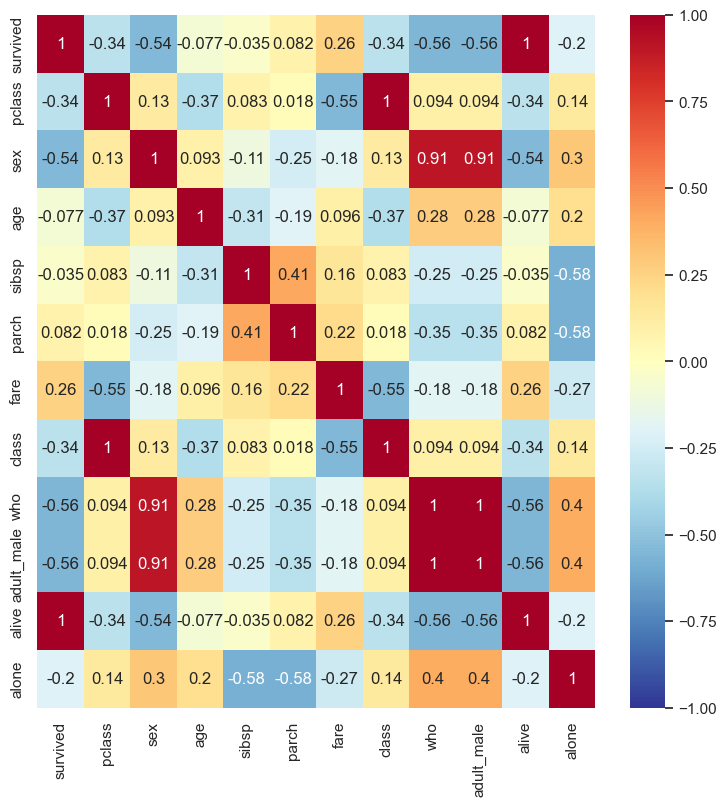

In [11]:
sns.heatmap(corr_df, annot=True ,cmap="RdYlBu_r", vmin=-1, vmax=1)

### 정오답 데이터 (혼동행렬 - confusion matrix)

In [15]:
from sklearn.metrics import confusion_matrix

In [12]:
sample = 100
true_labels = [0] * 80 + [1] * 20
predicted_labels = np.random.randint(2, size=sample)

In [16]:
conf_mtx = confusion_matrix(true_labels, predicted_labels)
conf_mtx

array([[45, 35],
       [ 7, 13]], dtype=int64)

<Axes: >

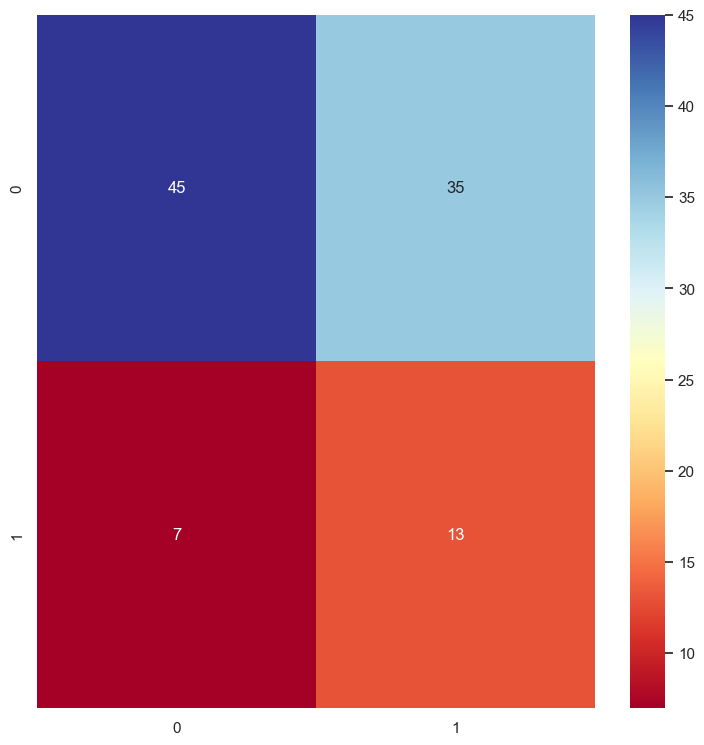

In [18]:
sns.heatmap(conf_mtx, annot=True, cmap='RdYlBu')

### 시계열 데이터

### 기온데이터

In [19]:
df = pd.read_csv('data_for_practice/온도_54_to_23.csv', encoding='cp949')
df

,\t\t지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,108,서울,1954-01,-1.5,2.5,10.7,1954-01-20,-5.5,-11.9,1954-01-26
1,108,서울,1954-02,0.4,5.1,12.2,1954-02-24,-4.3,-13.9,1954-02-03
2,108,서울,1954-03,3.1,8.6,18.2,1954-03-26,-1.6,-7.8,1954-03-13
3,108,서울,1954-04,11.8,18.4,26.8,1954-04-16,6.7,3.0,1954-04-21
4,108,서울,1954-05,16.6,23.1,28.6,1954-05-20,11.7,7.8,1954-05-17
...,...,...,...,...,...,...,...,...,...,...
830,108,서울,2023-03,9.8,16.2,25.1,2023-03-22,4.2,-1.9,2023-03-13
831,108,서울,2023-04,13.8,19.0,28.4,2023-04-19,8.8,3.1,2023-04-08
832,108,서울,2023-05,19.5,25.0,31.2,2023-05-16,14.6,7.9,2023-05-08
833,108,서울,2023-06,23.4,27.9,34.0,2023-06-19,19.7,16.6,2023-06-03


0      1954
1      1954
2      1954
3      1954
4      1954
       ... 
830    2023
831    2023
832    2023
833    2023
834    2023
Name: 일시, Length: 835, dtype: int32

In [23]:
df['연도'] = df['일시'].str.split('-').str[0].astype(int)
df['월'] = df['일시'].str.split('-').str[1].astype(int)
df

,\t\t지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자,연도,월
0,108,서울,1954-01,-1.5,2.5,10.7,1954-01-20,-5.5,-11.9,1954-01-26,1954,1
1,108,서울,1954-02,0.4,5.1,12.2,1954-02-24,-4.3,-13.9,1954-02-03,1954,2
2,108,서울,1954-03,3.1,8.6,18.2,1954-03-26,-1.6,-7.8,1954-03-13,1954,3
3,108,서울,1954-04,11.8,18.4,26.8,1954-04-16,6.7,3.0,1954-04-21,1954,4
4,108,서울,1954-05,16.6,23.1,28.6,1954-05-20,11.7,7.8,1954-05-17,1954,5
...,...,...,...,...,...,...,...,...,...,...,...,...
830,108,서울,2023-03,9.8,16.2,25.1,2023-03-22,4.2,-1.9,2023-03-13,2023,3
831,108,서울,2023-04,13.8,19.0,28.4,2023-04-19,8.8,3.1,2023-04-08,2023,4
832,108,서울,2023-05,19.5,25.0,31.2,2023-05-16,14.6,7.9,2023-05-08,2023,5
833,108,서울,2023-06,23.4,27.9,34.0,2023-06-19,19.7,16.6,2023-06-03,2023,6


In [25]:
pivot_table = df.pivot('월', '연도', '평균기온(℃)')
pivot_table

C:\Users\rluvu\AppData\Local\Temp\ipykernel_2620\1538617007.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df.pivot('월', '연도', '평균기온(℃)')


연도,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
월,,,,,,,,,,,,,,,,,,,,,
1,-1.5,-5.6,-3.9,-3.5,-6.0,-5.1,-3.3,-5.2,-3.4,-9.1,...,-0.7,-0.9,-3.2,-1.8,-4.0,-0.9,1.6,-2.4,-2.2,-1.5
2,0.4,-0.1,-3.4,-4.3,-0.8,2.4,1.7,-0.9,-0.7,-2.4,...,1.9,1.0,0.2,-0.2,-1.6,1.0,2.5,2.7,-1.1,2.3
3,3.1,4.4,3.7,0.0,3.7,6.0,6.7,5.4,3.2,5.5,...,7.9,6.3,7.0,6.3,8.1,7.1,7.7,9.0,7.7,9.8
4,11.8,11.1,9.5,10.4,10.8,10.2,10.6,11.7,10.0,11.4,...,14.0,13.3,14.1,13.9,13.0,12.1,11.1,14.2,14.8,13.8
5,16.6,15.9,15.1,16.9,16.3,17.9,16.5,17.3,17.6,16.9,...,18.9,18.9,19.6,19.5,18.2,19.4,18.0,17.1,19.1,19.5
6,19.6,21.4,19.7,20.1,22.2,20.4,20.6,21.9,21.1,21.2,...,23.1,23.6,23.6,23.3,23.1,22.5,23.9,22.8,23.3,23.4
7,21.9,24.5,24.3,22.4,25.6,24.4,24.8,26.2,26.1,24.5,...,26.1,25.8,26.2,26.9,27.8,25.9,24.1,28.1,27.3,26.7
8,25.7,26.2,24.8,24.1,23.8,25.8,26.2,26.8,25.1,25.7,...,25.2,26.3,28.0,25.9,28.8,27.2,26.5,25.9,25.7,NaN
9,20.3,20.7,20.4,18.9,19.8,20.8,20.8,21.5,20.3,20.5,...,22.1,22.4,23.1,22.1,21.5,22.6,21.4,22.6,22.4,NaN


<Axes: xlabel='연도', ylabel='월'>

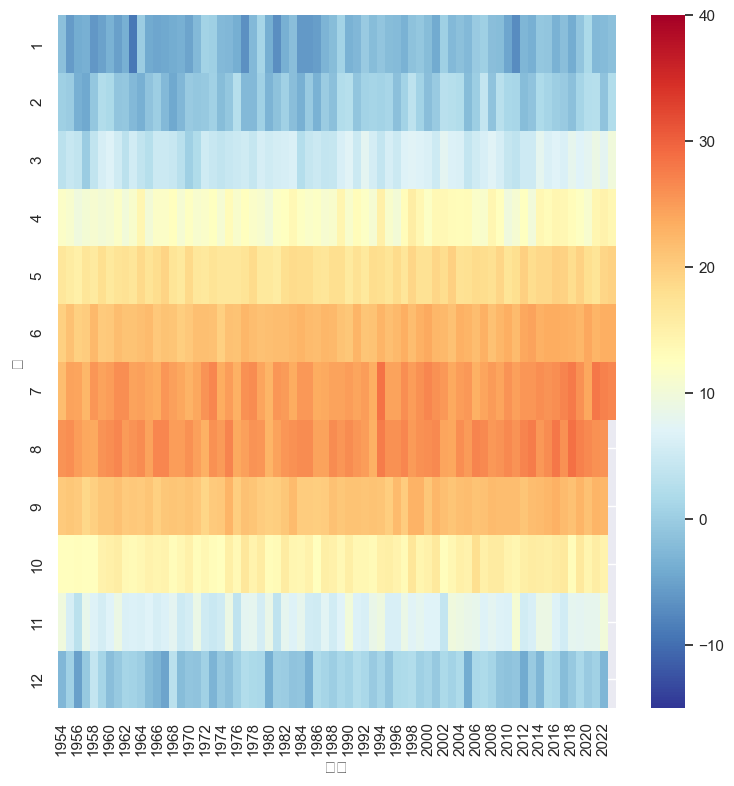

In [31]:
sns.heatmap(pivot_table,  cmap='RdYlBu_r', vmin=-15, vmax=40)

### 비행기 탑승자 수 데이터

In [33]:
df = sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [34]:
pivot_table = df.pivot('month', 'year', 'passengers')
pivot_table

C:\Users\rluvu\AppData\Local\Temp\ipykernel_2620\1050729683.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df.pivot('month', 'year', 'passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

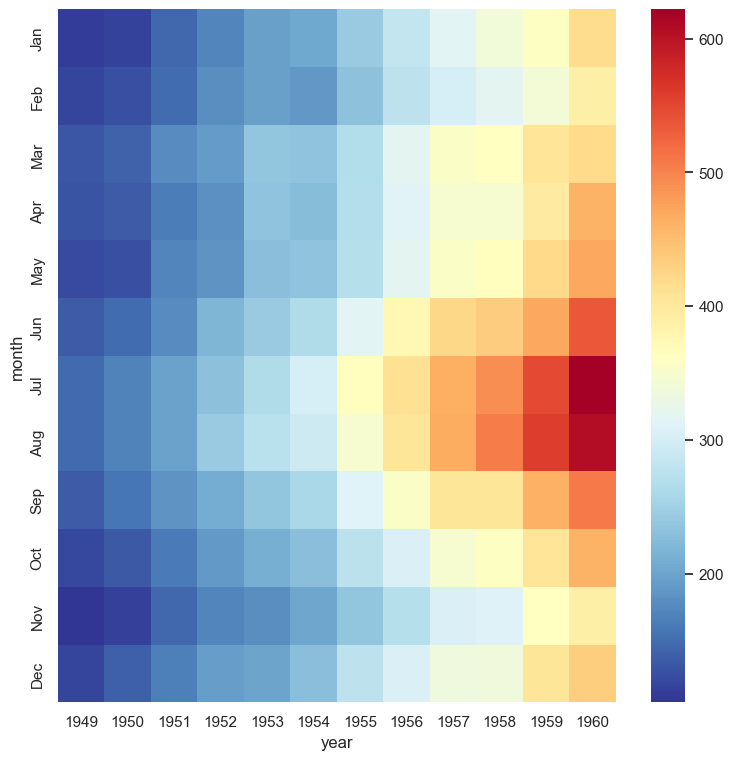

In [35]:
sns.heatmap(pivot_table, cmap='RdYlBu_r')